In [69]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [116]:
df = pd.read_csv('/data/npi_2013_clean1.csv')

In [172]:
df.columns.values

array(['Unnamed: 0', 'npi', 'last_name', 'first_name', 'entity_code',
       'provider_zip', 'provider_city', 'specialty_desc', 'bene_count',
       'total_claim_count', 'total_drug_cost', 'total_day_supply',
       'brand_claim_count', 'brand_claim_cost', 'generic_claim_count',
       'generic_claim_cost', 'other_claim_count', 'other_claim_cost',
       'mapd_claim_count', 'mapd_claim_cost', 'pdp_claim_count',
       'pdp_claim_cost', 'lis_claim_count', 'lis_claim_cost',
       'nonlis_claim_count', 'nonlis_claim_cost', 'brand_claim_cost_avg',
       'generic_claim_cost_avg', 'other_claim_cost_avg',
       'mapd_claim_cost_avg', 'pdp_claim_cost_avg', 'lis_claim_cost_avg',
       'nonlis_claim_cost_avg'], dtype=object)

In [184]:
keep_cols = list(df.columns[1:2]) + list(df.columns[8:])

In [185]:
keep_cols

['npi',
 'bene_count',
 'total_claim_count',
 'total_drug_cost',
 'total_day_supply',
 'brand_claim_count',
 'brand_claim_cost',
 'generic_claim_count',
 'generic_claim_cost',
 'other_claim_count',
 'other_claim_cost',
 'mapd_claim_count',
 'mapd_claim_cost',
 'pdp_claim_count',
 'pdp_claim_cost',
 'lis_claim_count',
 'lis_claim_cost',
 'nonlis_claim_count',
 'nonlis_claim_cost',
 'brand_claim_cost_avg',
 'generic_claim_cost_avg',
 'other_claim_cost_avg',
 'mapd_claim_cost_avg',
 'pdp_claim_cost_avg',
 'lis_claim_cost_avg',
 'nonlis_claim_cost_avg']

In [166]:
lst = [1, 2, 3, 4, 5, 6, 7, 8]

In [168]:
lst[3:5]

[4, 5]

In [158]:
X_train, X_test = train_test_split(df, test_size=.3, random_state=5)

In [159]:
mod_if = IsolationForest(random_state=5, verbose=True)

In [160]:
mod_if.get_params()

{'bootstrap': False,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': 5,
 'verbose': True}

In [161]:
mod_if.fit(X_train[keep_cols])

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min finished


IsolationForest(bootstrap=False, max_features=1.0, max_samples='auto',
        n_estimators=100, n_jobs=1, random_state=5, verbose=True)

In [42]:
preds = np.array(mod_if.predict(X_test))

In [43]:
sorted(preds, reverse=True)

[0.76822916323833446,
 0.76719111220177183,
 0.76563666500699434,
 0.76563666500699434,
 0.76511921615727052,
 0.76202185877119577,
 0.7615068529566793,
 0.76099219520434236,
 0.76099219520434236,
 0.76047788527895011,
 0.75945030796885538,
 0.75917272776622546,
 0.75865964751200232,
 0.75842411914769459,
 0.75739931693930573,
 0.75739931693930573,
 0.75688743522929347,
 0.75637589947006201,
 0.75586470942780337,
 0.75586470942780337,
 0.75586470942780337,
 0.75535386486886802,
 0.75486480545341916,
 0.75433321126715691,
 0.75382340175787077,
 0.75331393679888659,
 0.75280481615734318,
 0.75229603960053648,
 0.75178760689591995,
 0.75077177211385615,
 0.75077177211385615,
 0.74947398250973651,
 0.74925059302755115,
 0.74889329205713651,
 0.74874421856138895,
 0.74796470416827865,
 0.7477324960840469,
 0.7477324960840469,
 0.74748875659494407,
 0.74745919875886579,
 0.74722714761043862,
 0.74722714761043862,
 0.74672214067218035,
 0.74621747503844837,
 0.74544059122717765,
 0.7452975364

In [47]:
df1 = pd.DataFrame(preds)

In [63]:
df1[df1>.7].count()

0    653
dtype: int64

In [61]:
df1.shape

(314815, 1)

In [64]:
653./314815

0.0020742340739799566

In [66]:
X_test['prediction'] = preds

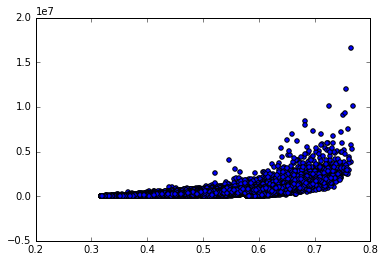

In [70]:
plt.scatter(X_test['prediction'], X_test['total_drug_cost'])

In [71]:
X_test[X_test['prediction']>.6].describe().T

,count,mean,std,min,25%,50%,75%,max
bene_count,8313,492.359978,503.372848,5.500000,167.000000,465.000000,694.000000,24164.000000
total_claim_count,8313,11138.212438,10881.092920,12.000000,1295.000000,9742.000000,17647.000000,191530.000000
total_drug_cost,8313,1024218.109728,742165.810884,14185.800000,635572.120000,916506.850000,1233138.770000,16602543.110000
total_day_supply,8313,388825.916396,352558.607557,360.000000,41423.000000,339939.000000,641385.000000,4339456.000000
brand_claim_count,8313,2663.534163,2976.878294,5.500000,105.000000,2366.000000,4021.000000,50199.000000
brand_claim_cost,8313,699032.432189,699763.713982,686.250991,272941.400000,619645.830000,900017.910000,15363456.740000
generic_claim_count,8313,8247.761879,8251.097187,0.000000,931.000000,6654.000000,13412.000000,141427.000000
generic_claim_cost,8313,198880.132965,182105.445453,0.000000,40073.750000,183209.930000,300979.220000,3272082.730000
other_claim_count,8313,117.827138,170.124776,0.000000,5.500000,71.000000,170.000000,2870.000000
other_claim_cost,8313,3453.667456,5333.025162,0.000000,211.378599,1784.460000,4818.530000,76750.420000


In [72]:
X_test[X_test['prediction']<.6].describe().T

,count,mean,std,min,25%,50%,75%,max
bene_count,306502,114.572075,147.334700,5.500000,19.000000,55.000000,156.000000,5820.000000
total_claim_count,306502,1044.189255,2119.091046,11.000000,47.000000,171.000000,845.000000,23322.000000
total_drug_cost,306502,73987.013937,147134.870756,15.880000,1470.925000,8139.605000,67379.210000,4012496.850000
total_day_supply,306502,41246.914555,89822.219251,11.000000,848.000000,3807.000000,29013.750000,838660.000000
brand_claim_count,306502,198.261116,477.733788,0.000000,5.500000,5.500000,84.000000,6143.000000
brand_claim_cost,306502,43798.294514,105752.929931,0.000000,996.322243,1490.856703,19185.870000,4010381.620000
generic_claim_count,306502,783.883975,1658.194901,0.000000,5.500000,114.000000,598.000000,18134.000000
generic_claim_cost,306502,19441.765307,39882.182742,0.000000,139.655981,2331.225000,16405.700000,533723.470000
other_claim_count,306502,8.844990,23.658738,0.000000,0.000000,0.000000,5.500000,680.000000
other_claim_cost,306502,264.437347,957.675896,0.000000,0.000000,0.000000,160.288469,263386.800000


In [73]:
df_labels = pd.read_csv('../data/medicare_labels_2013.csv')

In [80]:
df_labels = df_labels.iloc[:,1:]

In [81]:
df_labels

,First name,Middle,Last name,State,Doctor (has NPI?),Link,Status
0,Robert,A.,Glazer,CA,yes,https://www.justice.gov/opa/file/478556/download,Second Superseding Indictment
1,Angela,Pogosov,Avetisyan,CA,no,https://www.justice.gov/opa/file/478556/download,Second Superseding Indictment
2,Ashot,NaN,Minasyan,CA,no,https://www.justice.gov/opa/file/478556/download,Second Superseding Indictment
3,Marina,R.,Merino,CA,no,https://www.justice.gov/opa/file/478556/download,Second Superseding Indictment
4,Joseph,R.,Altamirano,CA,yes,https://www.justice.gov/opa/file/478836/download,Indictment
5,Oxana,NaN,Loutseiko,CA,no,https://www.justice.gov/opa/file/479651/download,Indictment
6,Christian,NaN,Hernandez,CA,no,https://www.justice.gov/opa/file/479651/download,Indictment
7,Maria,NaN,Espinoza,CA,no,https://www.justice.gov/opa/file/479651/download,Indictment
8,Susan,Tablang,Nimo,CA,no,https://www.justice.gov/opa/file/478846/download,Complaint
9,Artavazd,NaN,Pashyan,CA,no,https://www.justice.gov/opa/file/479656/download,Complaint


#### Check to see if labels are in outliers

In [82]:
import psycopg2 as pg2

In [87]:
conn = pg2.connect(dbname='medicare', user='postgres')
query = '''
        SELECT n.npi
            , indict.first_name
            , indict.last_name
            , indict.npi_status
        FROM indictments_2013 indict
            , npi_name n
        WHERE lower(indict.first_name) = lower(n.providerfirstname)
        AND lower(indict.last_name) = lower(n.providerlastnamelegalname)
        AND lower(indict.state) = lower(n.providerbusinessmailingaddressstatename);
        '''

In [88]:
df_labels = pd.read_sql_query(query, conn)

In [89]:
df_labels

,npi,first_name,last_name,npi_status
0,1528044815,Robert,Glazer,True
1,1881664829,Hatem,Ataya,True
2,1427000819,William,Binder,True
3,1538114632,Joseph,Altamirano,True
4,1033156278,Maria,Espinoza,False
5,1053354787,Aaron,Goldfein,True
6,1497781447,Mohamad,Bazzi,False
7,1902838014,Godwin,Ogbuokiri,True
8,1477571818,Waseem,Alam,True
9,1427136043,Rizwan,Qadir,True


this join has 13/16 of npi_status true. missing Pramela Gangi, Rodney Hesson, William Sokoli, Laren Lerner.... Robert Glazer is present twice

In [90]:
outliers = X_test[X_test['prediction']>.7]

In [92]:
outliers.shape

(653, 26)

In [93]:
outliers

,bene_count,total_claim_count,total_drug_cost,total_day_supply,brand_claim_count,brand_claim_cost,generic_claim_count,generic_claim_cost,other_claim_count,other_claim_cost,...,nonlis_claim_count,nonlis_claim_cost,brand_claim_cost_avg,generic_claim_cost_avg,other_claim_cost_avg,mapd_claim_cost_avg,pdp_claim_cost_avg,lis_claim_cost_avg,nonlis_claim_cost_avg,prediction
94525,879,33729,1830284.66,1005495,8927,1165264.51,24501,652247.01,301,12773.14,...,13307,685213.38,192.936023,23.082508,29.143358,54.736709,67.127356,67.169662,59.395760,0.740439
1010864,425,2643,1635883.59,94210,534,1544403.11,2095,91191.87,14,288.61,...,1921,1313450.77,2634.440258,42.099791,42.507954,534.441539,544.630783,505.100182,562.726111,0.705346
957564,150,4841,2169192.03,152319,2423,1983252.31,2403,185588.88,15,350.84,...,1315,658806.42,820.256942,60.077995,27.433501,354.131052,387.131407,442.460437,264.467853,0.705813
102246,1130,38828,1934533.91,1398648,9336,1305218.56,29203,619213.31,289,10102.04,...,20893,989074.55,192.936023,23.082508,29.143358,54.736709,67.127356,67.169662,59.395760,0.730989
352680,992,32882,1947377.98,1010397,7892,1216918.26,24856,728058.88,134,2400.84,...,12241,678702.95,181.149499,22.071589,28.569992,50.773910,58.693464,59.878618,52.614634,0.707804
56088,949,34656,2044448.49,1158924,6926,1196317.29,27367,838873.11,363,9258.09,...,9269,482096.28,192.936023,23.082508,29.143358,54.736709,67.127356,67.169662,59.395760,0.730968
70527,1039,24843,1566285.09,996503,5239,1103946.17,19371,455096.24,233,7242.68,...,16459,929907.24,192.936023,23.082508,29.143358,54.736709,67.127356,67.169662,59.395760,0.711435
384331,815,24226,1459187.21,936975,5463,1001087.56,18346,443034.96,417,15064.69,...,7271,430542.25,181.149499,22.071589,28.569992,50.773910,58.693464,59.878618,52.614634,0.714579
1011038,181,1918,2198959.74,61395,834,2058525.36,1084,140434.38,0,0.00,...,569,429550.49,2634.440258,42.099791,42.507954,534.441539,544.630783,505.100182,562.726111,0.718231
388667,1516,32091,1551679.64,1021523,6533,1032515.48,25372,513586.15,186,5578.01,...,13115,599604.23,181.149499,22.071589,28.569992,50.773910,58.693464,59.878618,52.614634,0.714316


In [101]:
outliers = outliers.join(df['npi'])

In [102]:
outliers.shape

(653, 27)

In [106]:
for i in np.array(df_labels['npi']):
    if i in np.array(outliers['npi']):
        print i

In [107]:
df_labels['npi']

0     1528044815
1     1881664829
2     1427000819
3     1538114632
4     1033156278
5     1053354787
6     1497781447
7     1902838014
8     1477571818
9     1427136043
10    1447300504
11    1689728958
12    1700900321
13    1265610836
14    1548427164
15    1700040110
16    1801142815
17    1225385941
18    1598007304
19    1942695705
Name: npi, dtype: int64

In [108]:
outliers['npi']

94525      1659348647
1010864    1639132269
957564     1558338889
102246     1811972425
352680     1881694545
56088      1225083603
70527      1003830191
384331     1265490114
1011038    1093785396
388667     1174589410
114888     1871557454
24943      1043221492
1025059    1770548596
87846      1629002787
380549     1659305928
971423     1194895045
306348     1972578128
372716     1154491249
17407      1760481873
88837      1417981911
459068     1124073788
62620      1417916933
317345     1982673232
71788      1356395107
957218     1144245382
994777     1942253737
89579      1538181763
462550     1508847831
1021629    1972514073
397910     1144281791
              ...    
962512     1134157407
78328      1154330355
64056      1376516484
989217     1548207814
95200      1164432274
39527      1932324696
97235      1326062597
313002     1780781138
347276     1346262185
321031     1780688028
407984     1447248265
372741     1023000239
116183     1508932195
74593      1295722627
959494    

In [112]:
for i in outliers['npi']:
    [i if i in df_labels['npi']]

SyntaxError: invalid syntax (<ipython-input-112-232bed2451be>, line 2)

In [115]:
X_test[X_test['npi']]

KeyError: 'npi'

In [188]:
for row in df_labels['npi']:
    print row

1528044815
1881664829
1427000819
1538114632
1033156278
1053354787
1497781447
1902838014
1477571818
1427136043
1447300504
1689728958
1700900321
1265610836
1548427164
1700040110
1801142815
1225385941
1598007304
1942695705


In [191]:
1528044815 in list(df_labels['npi'])

True

In [192]:
def check_labels(label_df, test_df, model):
    """Returns list of doctors/npi that are found as outliers.

    Parameters
    -----------
    label_df : pandas df
        Dataframe of doctors with indictments
    test_df : pandas df
        Dataframe of test split
    model : isolation forest model
        Trained sklearn isolation forest model

    Returns
    ---------
    df : test data frame with prediction and label if found in label set

    Examples
    --------
    """
    test_df['prediction'] = model.predict(test_df)
    test_df['indicted'] = [1 if row in list(label_df['npi']) else 0 for row in test_df['npi']]

    return test_df